<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Práctica 1 - Grafos </h2>
</center>
</p>
</div>

<div class="alert alert-danger" style="width:95%; margin:0 auto; padding">
<center><p><h2> ¡¡IMPORTANTE!! </h2></p> </center> 

<p>
Para la realización de esta práctica tendréis que utilizar la clase de grafos NetworkX y <b>NO</b> la clase `Graph` que implementasteis en la Práctica 0. Hay casos muy concretos que no contemplaban los tests y podría hacer que vuestros algoritmos no funcionen correctamente. NetworkX tiene una interfaz muy similar a la librería <i>Graph</i> que implementasteis la semana pasada. Para más información podéis consultar la documentación de la librería <a href="https://networkx.github.io/documentation/latest/reference/introduction.html">aquí.</a>
</p>
</div>

<div class="alert alert-info">
<center>
  <h1>Introducción</h1>
</center>

A lo largo de esta práctica trabajaremos con el grafo generado a partir de la red de metro de Londres. En este grafo, los nodos representan las estaciones y las aristas las vias que van de una estación a otra. Todas las aristas tienen cuatro atributos:

* Linea
* Color
* Nombre (de la linea)
* Distancia

Los nodos contienen: 
* El nombre de la estación
* La latitud y longitud de la estación
* Número de lineas
* Zona


In [1]:
from util import get_subway_graph, draw_subway_graph
from networkx import nx

# Carga del grafo del metro con el que trabajaremos
G, lines = get_subway_graph('csv')

# Algunos nodos
print(list(G.nodes())[:20],'...')
# Algunas aristas
print(list(G.edges())[:20],'...')
print('\n')
print("Ejemplo de arista: ",G.edges[156,167])
print("Ejemplo de nodo: ",G.node[33])

[11, 163, 212, 49, 87, 197, 82, 193, 84, 148, 279, 113, 246, 298, 114, 140, 137, 206, 237, 143] ...
[(11, 163), (11, 212), (11, 83), (11, 104), (11, 28), (11, 249), (11, 94), (163, 82), (212, 192), (49, 87), (49, 197), (49, 151), (87, 279), (87, 255), (87, 285), (197, 192), (197, 107), (197, 151), (82, 193), (193, 278)] ...


Ejemplo de arista:  {'name': 'Metropolitan Line', 'color': '8b004c', 'stripe': 'NULL', 'line': 8, 'distance': 0.006350590523722737}
Ejemplo de nodo:  {'latitude': 51.5269, 'longitude': -0.0247, 'name': 'Bow Road', 'display_name': 'Bow<br />Road', 'zone': 2.0, 'total_lines': 2, 'rail': '0'}


Para más consultas, la información ha sido extraida de Wikimedia Commons:

https://commons.wikimedia.org/wiki/London_Underground_geographic_maps/CSV

# util.py

En este archivo se os facilitan varias funciones que os permitiran cargar y visualizar la red de metro.
```python
"""
Retorna un objeto nx.Graph que corresponde al grafo de la red de metro y un 
diccionario con las lineas del metro
 - location: ruta donde esta almacenado el archivo .csv
"""
G, lines = get_subway_graph(location)

"""
Dibuja el grafo que le pasemos por parametro.
- G: Grafo de la red de metro
- lines: diccionario con la información sobre las lineas del metro
- figsize: parametro opcional que nos permite definir el tamaño de la figura
- show_labels: parametro opcional que nos permite indicar si queremos mostrar los 
    nombres de las estaciones
"""
draw_subway_graph(G, lines, figsize=(10,6), show_labels=False)

```

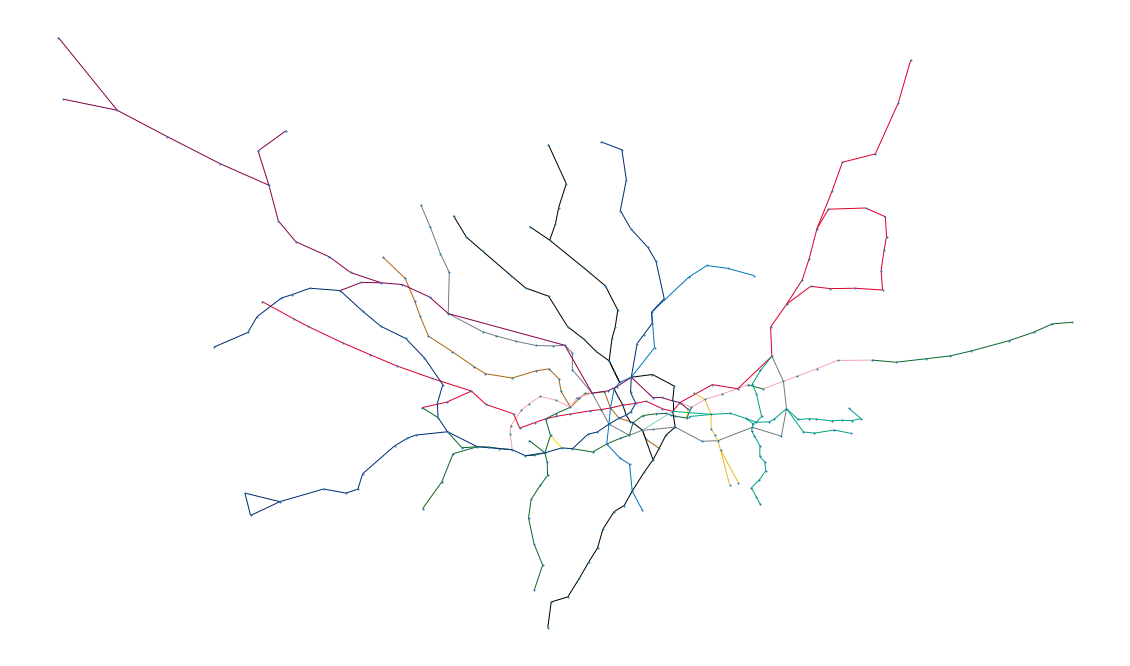

In [2]:
draw_subway_graph(G, lines, figsize=(20,12))

<div class="alert alert-info">
<center>
  <h1>Contenido</h1>
  </center><p>



<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>1- Dijkstra</p></h2>
  <p>
 En esta segunda parte de la práctica se propone que implementéis el algoritmo <a href="https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm">Dijkstra</a> (explicado en teoría) para encontrar el camino más corto entre dos paradas de la red de metro de Londres.
</p>



<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo (en el caso de esta practica la red de metro) que utilizaremos para buscar el camino. Debe de ser un objeto de tipo `nx.Graph`.</li>
<li>__origen__: Este parámetro corresponde al índice de un nodo. En este caso, como indexamos los nodos con el identificador de las paradas de Metro, deberá ser un entero _(e.g. 231)_.</li>
<li>__destino__: El indice del nodo al que queremos llegar. Igual que el origen, deberá ser un entero.</li>
<li>__infinity=*(int)*__: Parametro opcional en el que definimos que numero nos va bien para utilizar como infinito en el momento de inicializar los pesos de los nodos.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un <b>diccionario</b> que contiene los siguientes valores
<ul>
<li>__ _'path'_ __: Una lista de índices correspondientes al camino encontrado del nodo inicial al nodo final (ambos nodos, inicio y final, han de estar incluidos en esta lista).</li>
<li>__ _'expanded'_ __: El numero de nodos que se han visitado para encontrar la solución.</li>
<li>__ _'distance'_ __: La distancia del camino mínimo desde el origen hasta el destino (es decir, el valor del nodo destino).
<ul>

</p>
</div>


In [3]:
from math import inf

def dijkstra(G, origen, destino, infinity=inf):
    # All nodes left,
    # no parents,
    # all distances are inf
    
    left = list(G.nodes)
    parent = {n: None for n in G.nodes}
    distance = {n: infinity for n in G.nodes}
    
    expanded = 0
    
    # Origin node has distance 0
    distance[origen] = 0 
    
    while len(left) != 0:
        # We take the node in left with smaller distance
        # as the pivot node in every iteration
        _, _next = min([(distance[u], u) for u in left])
        
        left.remove(_next)
        expanded += 1
        
        for _neig in G.neighbors(_next):
            expanded += 1
            
            # We compute the distance and check 
            # if it's smaller than the actual one in distance dict
            # if True, we mark _next as parent of _neig
            _d = distance[_next] + G.edges[_next, _neig]["distance"]
            
            if _d < distance[_neig]:
                distance[_neig] = _d
                parent[_neig] = _next
    
    # Backtracking
    path = []
    c = destino
    
    while True:
        path.insert(0, c)
        c = parent[c]
        
        if c is origen:
            path.insert(0, c)
            break
    
    return {
        "path": path,
        "expanded": expanded,
        "distance": distance[destino]
    }

In [4]:
# Prueba tu algoritmo! 
_test = [10, 128, 39, 145, 89, 277, 192, 107, 133, 146, 236, 99, 74, 17, 110, 265, 1, 73, 182, 194, 5, 252, 251, 235]
_out = dijkstra(G, 10, 235)

print("😃" if _test == _out["path"] else "😕")

😃


<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>2- Paradas intermedias</p></h2>
   <p>
 Se propone aquí implementar una variante del algoritmo Dijkstra que encuentre el camino más corto entre dos paradas de metro forzando el mismo a pasar por una serie de paradas intermedias. Por ejemplo, queremos encontrar el camino más corto entre el nodo 10 y 235 pero pasando por el 33 y el 122. El algoritmo debe encontrar el orden idóneo de visita de los nodos intermedios (33 --> 122 o 122 --> 33) sabiendo que empezamos en 10 y acabamos en 235.
</p>

<p></p>

<p>
<b> Nota: </b> Recordad que en Algorítmica Avanzada buscamos la implementación de algoritmos que no solo resuelvan el problema, sino que lo hagan de manera eficiente.
</p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo (en el caso de esta practica la red de metro) que utilizaremos para buscar el camino. Debe de ser un objeto de tipo `nx.Graph`.</li>
<li>__origen__: Este parámetro corresponde al índice de un nodo. En este caso, como indexamos los nodos con el identificador de las paradas de Metro, deberá ser un entero _(e.g. 231)_.</li>
<li>__destino__: El indice del nodo al que queremos llegar. Igual que el origen, deberá ser un entero.</li>
<li>__paradas__: Una lista de índices de nodos por los que queremos pasar de camino entre el origen y el destino. </li>
<li>__infinity=*(int)*__: Parametro opcional en el que definimos que numero nos va bien para utilizar como infinito en el momento de inicializar los pesos de los nodos.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un <b>diccionario</b> que contiene los siguientes valores
<ul>
<li>__'ordering'__: Una lista de índices en el orden óptimo de visita. El primer y último elemento de la lista deben corresponderse, respectivamente, con el nodo origen y destino. El resto de elementos de la lista serán todas las paradas solicitadas.</li>
<li>__'expanded'__: El numero de nodos que se han visitado para encontrar la solución.</li>
    <li>__'distance'__: La distancia que se recorrerá desde el origen hasta el destino.</li>
</ul>

</p>


<p>
<b>Nota: </b> No se pide el camino completo entre origen y destino, solo el orden óptimo de visita de los nodos. No obstante, se valorará positivamente la reconstrucción del camino completo. Si lo incluís, añadidlo al diccionario que se devuelve con la clave 'complete_path'.
    </p>
</div>


In [5]:
# We use memoizaton of the dijkstra function,
# so we may save some time when calling
# stop_ordering with a big paradas array
def memoize(func):
    cache = {}

    def helper(*args):
        if args in cache:
            return cache[args]
        
        result = func(*args)
        cache[args] = result
        
        return result

    return helper

dijkstra = memoize(dijkstra)

In [6]:
from itertools import permutations

def stops_ordering(G, origen, destino, paradas, infinity=inf):
    # Main global variables
    # to be returned
    expanded, distance = 0, 0
    path, ordering = [], []
    
    # Global minimum
    m = infinity
    
    # Loop over all possible trip 
    # permutations
    for p in permutations(paradas):
        _s = [origen] + list(p) + [destino]
        _d, _bad = 0, False
        _p, _e, _o = [], 0, []
        
        # We call dijkstra on every subtrip
        # and check if the relative distance is 
        # smaller then the global minimum
        for i in range(len(_s)-1):
            _tmp = dijkstra(G, _s[i], _s[i+1], infinity)
            _p += _tmp["path"]
            _e += _tmp["expanded"]
            _d += _tmp["distance"]
            
            # If the relative distance is above
            # the global minimum, we do not need
            # to continue, as it's a longer trip
            if m < _d:
                _bad = True
                break
        
        # If the current permutation is longer than
        # the minimum, we don't want to update the
        # global variables, so we continue to 
        # the next permutation
        if _bad:
            continue
        
        # We update the global minimum distance
        if _d < m:
            m = _d
        
        ordering = _s
        path = _p
        distance = _d
        expanded = _e
    
    # As we called dijkstra before, we have 
    # the path without the need of backtracking it
    return {
        "complete_path": path,
        "ordering": ordering,
        "expanded": expanded,
        "distance": distance
    }

In [7]:
# Prueba tu algoritmo! El orden de recorrido esperado es: 
_test = [10, 33, 122, 235]
_p = [122, 33]
_stops = stops_ordering(G, 10, 235, _p)

print("😃" if _test == _stops["ordering"] else "😕")
print("The path via the given stops {} is:\n{}".format(_p, _stops["complete_path"]))

😃
The path via the given stops [122, 33] is:
[10, 128, 39, 145, 92, 14, 167, 156, 3, 295, 244, 164, 33, 33, 164, 244, 295, 3, 156, 13, 279, 285, 248, 273, 229, 236, 99, 122, 122, 74, 17, 110, 265, 1, 73, 182, 194, 5, 252, 251, 235]


In [8]:
_p = [122, 33, 9, 201, 13, 67, 99, 198]
_stops = stops_ordering(G, 1, 199, _p)

print("The ordering via the given stops {} is:\n{}\nWith distance: {}"
      .format(
        _p,
        _stops["ordering"],
        _stops["distance"]
        )
     )

The ordering via the given stops [122, 33, 9, 201, 13, 67, 99, 198] is:
[1, 122, 99, 198, 13, 201, 67, 33, 9, 199]
With distance: 1.266297637323176


<div class="alert alert-warning" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios Dijkstra</h3></p> </center> </div>

L'algoritme emprat és el estàndard.
La complexitat d'aquest és $O((V+E) \log V)$, on $V$ és el nombre de nodes i $E$ el nombre de d'aristes.

<div class="alert alert-warning" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios Orden óptimo de Paradas Intermedias</h3></p> </center> </div>

El problema plantejat és equivalent al [Travelling Salesman Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem). En la solució plantejada, he utilitzat l'algortime directe, calculant totes les possibles combinacions, però tenin en compte un mínim global. D'aquesta manera, si en alguna permutació ja s'ha excedit dit límit, no es segueix computant. Es podria utilitzar algún tipus d'heurística també.

La complexitat d'aquest és, en el pitjor cas: $O((n+1)! \cdot X)$ on $n$ ñes el nombre de parades i $X$ és la complexitat de Dijkstra. Utilitzant la funció  de cache `memoize` i aplicant-la a la funció `dijsktra`, podem arribar a estalviar un gran nombre d'iteración per a casos en que $n$ és prou gran.

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>
<p>
La entrega de esta práctica se podrá realizar en el campus virtual hasta el día <b>27 de Octubre a las 23:55</b>. En la tarea que se habilitará en el campus deberéis colgar únicamente este notebook con el nombre:
</p>
<p>
```
* [grupo]_[apellido]_[nombre]_1-Grafos.ipynb
```

</p>
<p>
    Por ejemplo, para un alumno llamado <i>Nombre Genérico</i> perteneciente al <i>grupo Z</i> el nombre del archivo debería ser:
</p>
<p>
```
Z_Generico_Nombre_1-Grafos.ipynb
```

</p>
<p>

Es muy importante que en el notebook exista <b> una sola función </b> con el nombre <i>dijkstra</i> y <i>stops_ordering</i> ya que emplearemos un corrector automático para agilizar el proceso. No os preocupéis si no os funciona del todo, el no pasar los tests no significa necesariamente que tengáis un 0 en la práctica; también revisaremos manualmente el código así como los comentarios del final del notebook y vuestro análisis de complejidad.


Es fundamental que el código esté bién comentado y con un análisis de complejidad exhaustivo del algoritmo. La importancia de poner nombre correcto al archivo debería ser directamente proporcional a lo contentos que queráis que los profesores de prácticas corrijan.
</p>
</div>